In [0]:
##mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json

In [0]:
base_path = '/content/drive/My Drive/DL_exp/'

8640


Text(0.5, 0.98, '')

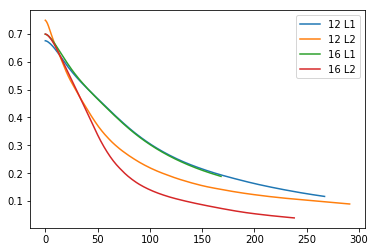

In [0]:
### plot loss vs epoch graph

with open(base_path+'result_Hypothesis_B9/loss_uniform.json', mode='r') as readjson:
  epoch_loss = json.loads(readjson.read())
  print(len(epoch_loss))
  
# possible values 
total_n_nodes = [2,4,6,8,12,16,24,32,48,64,128,256] 
inits = [100,200,300,400,500,600,700,800,900,1000]
dimentions = [2,4,8,16,32,64] 
shell_radius = [1.2,1.4,1.5,1.6,1.8,2]

# compare loss-epoch curve for different number of hidden nodes
sh = 1.5
dim = 16
init = 1000
fig = plt.figure()

for h_nodes in total_n_nodes[4:6]:  
  # for 1 hidden layer model
  tt = np.array(epoch_loss['sh'+ str(sh)+'dim'+str(dim)+'h'+str(h_nodes)+'i'+str(init)])
  epoch = tt[:,0]
  loss = tt[:,1]
  plt.plot(epoch,loss,label=str(h_nodes)+' L1')
  # for 2 hidden layer model
  tt = np.array(epoch_loss['sh'+ str(sh)+'dim'+str(dim)+'h'+str(h_nodes)+'i'+str(init)+'l2'])
  epoch = tt[:,0]
  loss = tt[:,1]
  plt.plot(epoch,loss,label=str(h_nodes)+' L2')

plt.legend(loc='upper right')
fig.suptitle('', fontsize=20)
# fig.savefig(base_path+'result_Hypothesis_B9/plots/6.jpg')

8640


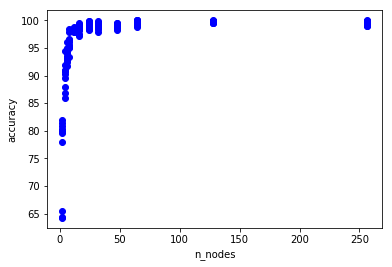

In [0]:
### plot accuracy vs {dimension/shell_radius/n_nodes} graph
with open(base_path+'result_Hypothesis_B9/uniform_result.json', mode='r') as readjson:
  result = json.loads(readjson.read())
  print(len(result))

# np.unique([[d['shell_radius'],len(d['n_nodes'])] for d in result],axis=0)

# fix value of other parameters
dim = 8
sr = 1.6
hl = 1
n_nodes = 8

# accuracy = [d['accuracy'] for d in result if len(d['n_nodes'])==hl and d['n_nodes'][0]==n_nodes and d['shell_radius']==sr ]
# dimension = [d['dimension'] for d in result if len(d['n_nodes'])==hl and d['n_nodes'][0]==n_nodes and d['shell_radius']==sr ]

# accuracy = [d['accuracy'] for d in result if len(d['n_nodes'])==hl and d['n_nodes'][0]==n_nodes and d['dimension']==dim ]
# shell_radius = [d['shell_radius'] for d in result if len(d['n_nodes'])==hl and d['n_nodes'][0]==n_nodes and d['dimension']==dim ]

accuracy = [d['accuracy'] for d in result if len(d['n_nodes'])==hl and d['shell_radius']==sr and d['dimension']==dim ]
n_nodes = [d['n_nodes'][0] for d in result if len(d['n_nodes'])==hl and d['shell_radius']==sr and d['dimension']==dim ]

fig = plt.figure()
plt.plot(n_nodes,accuracy,'bo')
plt.xlabel('n_nodes')
plt.ylabel('accuracy')
axes = plt.gca()
# fig.set_size_inches(15, 5)
# plt.xticks(np.arange(0, 257, 8))
# axes.set_xlim([0,66])
# axes.set_ylim([99,101])
# fig.suptitle('shell_radius=1.5, dimension=64, layer 1', fontsize=20)
# fig.savefig('result_Hypothesis_B9/plots/13.jpg')